**TP N°4 - LBP**

En este trabajo práctico se emplea un código para LBP. El objetivo es identificar texturas de imágenes, y a través de ellas establecer una relación entre imágenes distintas pero de objetos similares (piedras, ladrillos, ovejas, una imagen del cielo y un bonus track). 
LBP se obtiene a través de recorrer cada pixel de la imagen y asignarle un valor en función de su intensidad y la de sus vecinos. Se analizan los histogramas resultantes con la métrica de Correlación (cv2.comparehist)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
####### Se incorporan las librerías necesarias.
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
from google.colab.patches import cv2_imshow

In [1]:
####### Se define la función para cargar las imágenes.
def carga_imagen(img):
    imagen = cv2.imread('/content/drive/MyDrive/CV I/Imágenes TPs/TP4/' + img)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    return imagen
  
def carga_imagen2(img):
    imagen = cv2.imread('/content/drive/MyDrive/' + img)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    return imagen

In [5]:
######## Carga de imagen.
piedras1 = carga_imagen('piedras1.png')
piedras2 = carga_imagen('piedras2.png')
ladrillos1 = carga_imagen('ladrillos1.png')
ladrillos2 = carga_imagen('ladrillos2.png')
cielo = carga_imagen('cielo.png')
oveja1 = carga_imagen('oveja1.png')
oveja2 = carga_imagen('oveja2.png')
voltio2 = carga_imagen2('voltio2.jpeg')
voltio3 = carga_imagen2('voltio3.jpeg')

In [6]:
#### La función LBP recorre cada pixel de la imagen. Devuelve un arreglo de los valores nuevos de intensidad (según el código binario de la comparación con los vecinos).
def LBP(img):
    arr = np.zeros(img.shape, np.uint8)
    for i in range(arr.shape[0]-1):
        for j in range(arr.shape[1]-1):
            arr[i,j] = evalua(img, i, j)
    return arr

In [7]:
##### La función Evalua determina el resultado final de aplicarle la comparación de intensidad al pixel central que recorre la función LBP sobre la imagen, respecto de sus vecinos.
#### Elegí un sentido que comienza con el pixel a la izquierda, y luego va en sentido antihorario, tal cual se comentó en clase.
#### Comparo cada vecino con el pixel central con un ">=". En caso de ser efectivamente mayor, sumo la potencia de 2 correspondiente.
def evalua(img,i,j):
    result=0
    if img[i-1, j] >= img[i, j]:
        result+=1
    if img[i-1, j+1] >= img[i, j]:
        result+=2
    if img[i , j+1] >= img[i, j]:
        result+=4
    if img[i+1, j+1] >= img[i, j]:
        result+=8
    if img[i+1,j] >= img[i, j]:
        result+=16
    if img[i+1, j-1] >= img[i, j]:
        result+=32
    if img[i, j-1] >= img[i, j]:
        result+=64
    if img[i-1, j-1] >= img[i, j]:
        result+=128
    return result

In [8]:
def histograma_LBP(arr, arr2):
    h = cv2.calcHist(arr,[0],None,[256],[0,256])
    h = cv2.normalize(h,h)
    h2 = cv2.calcHist(arr2,[0],None,[256],[0,256])
    h2 = cv2.normalize(h2,h2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    metric = cv2.compareHist(h, h2, cv2.HISTCMP_CORREL)
    plt.figure(figsize = (7,3))
    plt.plot(h)
    plt.plot(h2)
    plt.xlim([0,256])
    plt.show()
    return metric

In [9]:
def compare_imgs(img1, img2):
    LBP1=LBP(img1)
    LBP2=LBP(img2)
    metric = histograma_LBP(LBP1, LBP2)
    print("Métrica de comparación:")
    print(metric)
    fig, ax = plt.subplots(2, 2, figsize=(7,7))
    ax[0,0].imshow(img1, cmap='gray')
    ax[0,1].imshow(img2, cmap='gray')
    ax[1,0].imshow(LBP1, cmap='gray')
    ax[1,1].imshow(LBP2, cmap='gray')
    plt.show()   

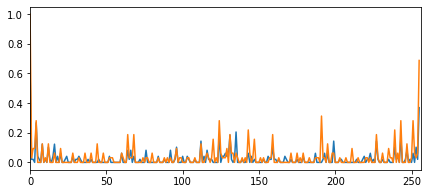

Métrica de comparación:
0.8517241934547058


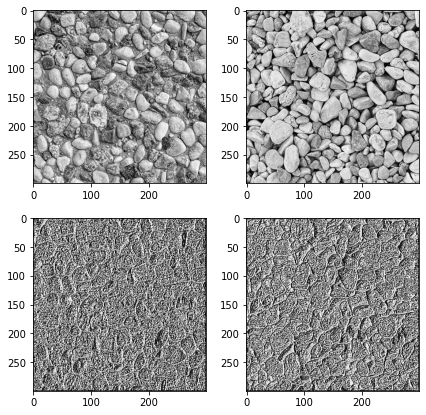

In [69]:
compare_imgs(piedras1, piedras2)

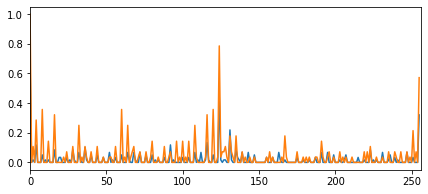

Métrica de comparación:
0.8747887671138145


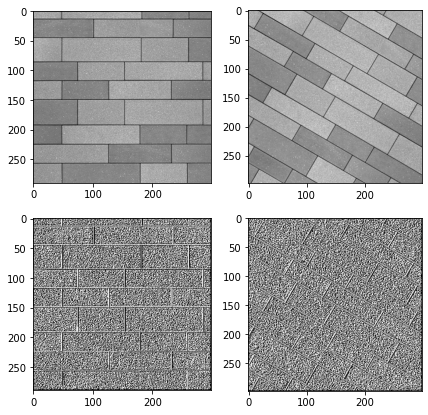

In [70]:
compare_imgs(ladrillos1, ladrillos2)

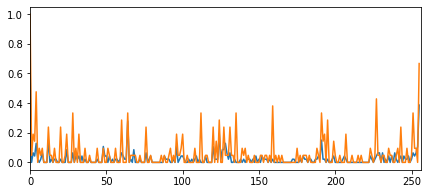

Métrica de comparación:
0.7696907710415003


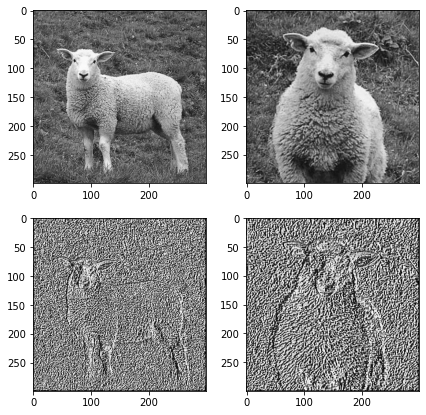

In [71]:
compare_imgs(oveja1, oveja2)

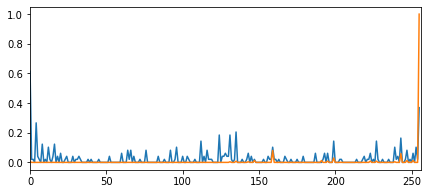

Métrica de comparación:
0.40076065636754526


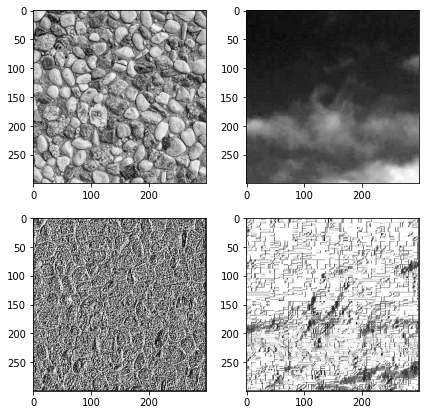

In [72]:
compare_imgs(piedras1, cielo)

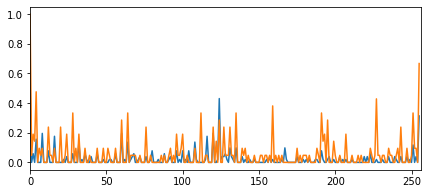

Métrica de comparación:
0.7285800729982883


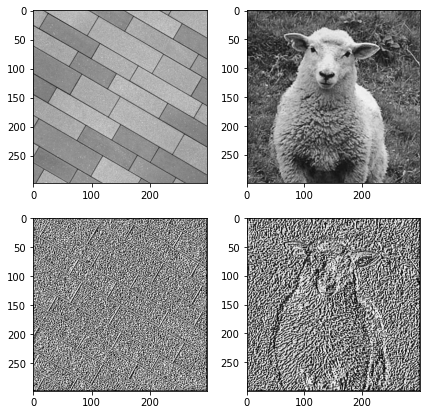

In [75]:
compare_imgs(ladrillos2, oveja2)

**Bonus: Voltio (felino doméstico).**

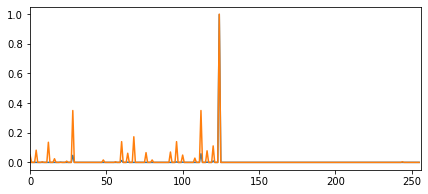

Métrica de comparación:
0.8862329475906484


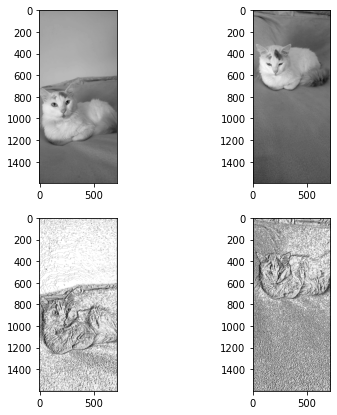

In [18]:
compare_imgs(voltio2, voltio3)

**Conclusiones.**

Las métricas dan valores cercanos a uno (del orden de 0.8) cuando tenemos objetos de la misma índole aunque diferentes (piedras contra piedras, y ladrillos, ovejas y Voltio en distintas posiciones). Al comparar piedras contra cielo, vemos una gran diferencia en las texturas y así también en el histograma, lo que se refleja en la métrica (0.4). Aunque, al comparar ladrillos contra ovejas, las texturas reflejan similitudes y la métrica vale 0.7. Allí no puede distinguirse de la mejor forma estos objetos.